# AOS 2017 Distance Measurements in Sumerian Literature  

https://github.com/niekveldhuis/AOS2017

Niek Veldhuis  
Department of Near Eastern Studies  
Berkeley Institute for Data Science  
UC Berkeley

How can Sumerian literary texts be grouped? This notebook will take the 394 literary texts edited in [ETCSL](http://etcsl.orinst.ox.ac.uk/) and one text edited in [ORACC](http://oracc.org) to compute distances based on vocabulary and use these distances to cluster compositions. We will look in more detail at the heroic texts around Enmerkar, Lugalbanda, and Gilgameš.

This notebook owes much the blog post on hierarchical clustering by [Jörn Hees](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/) and the text clustering Notebook by [Brandon Rose](http://brandonrose.org/clustering), which combines K-means, hierarchical clustering and topic modeling.

In [1]:
import pandas as pd
import glob
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Read in ETCSL Data
The [ETCSL](http://etcsl.orinst.ox.ac.uk/) data have been reduced to their *lemmatizations* in ORACC style.

|         | Representation |
|---------|-----------|
|Sumerian |    **𒈗𒂊 𒂍 𒈬𒌦𒆕**|
|Transliteration| **lugal-e e₂ mu-un-du₃**|
|Translation| The king built the temple.|
|Lemmatization| **sux:lugal[king]N sux:e[house]N sux:du[build]V/t**|

The files are organized by line; the example shows the first few lines from Gilgameṣ and Aga.



In [2]:
path =r'cleaned' # indicate the local path where etcsl files are stored
allFiles = glob.glob(path + "/*.txt")
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
etcsl_data = pd.concat(list_)  
etcsl_data.loc[etcsl_data['id_text'] == 'c.1.8.1.1'].drop('version', axis=1).head()

id_text         text_name l_no  \
0  c.1.8.1.1  Gilgameš and Aga    1   
1  c.1.8.1.1  Gilgameš and Aga    2   
2  c.1.8.1.1  Gilgameš and Aga    3   
3  c.1.8.1.1  Gilgameš and Aga    4   
4  c.1.8.1.1  Gilgameš and Aga    5   

                                                text  
0  sux:kiŋgia[messenger]N sux:Aga[1]RN sux:dumu[c...  
1  sux:Kiš[1]SN sux:Gilgameš[1]DN sux:Unug[1]SN s...  
2  sux:Gilgameš[1]DN sux:igi[eye]N sux:abba[fathe...  
3  sux:inim[word]N sux:ŋar[place]V/t sux:inim[wor...  
4  sux:tul[fountain]N sux:til[complete]V/i sux:tu...

# Group Lines into Compositions
In order to analyse this data in a text by text comparison all the lines that belong to a single composition are concatenated into a single row.

Group the rows by `id_text` and apply the `join` function to the `text` column. Transform the aggregated data into a new DataFrame. The `groupby` function as applied here leaves us only with `id_text` (as index) and the `text` column. The column `text_name` is restored by creating a table of `id_text` and `text_name` values from the original DataFrame and merging this table with our new DataFrame.

The example data shown represent the heroic narratives around Enmerkar, Lugalbanda, and Gilgameš.

In [3]:
etcsl_data = etcsl_data[['id_text', 'text_name', 'text']] # select the relevant columns
etcsl_data = etcsl_data.dropna() # drow rows that have no content
etcsl_bytext = etcsl_data['text'].groupby(etcsl_data['id_text']).apply(' '.join)
etcsl_bytext_df = pd.DataFrame(etcsl_bytext)
etcsl_id_names = etcsl_data[['id_text', 'text_name']].drop_duplicates().set_index('id_text') # create a df with text IDs and text names
etcsl_data_df = pd.merge(etcsl_id_names, etcsl_bytext_df, right_index=True, left_index=True)
heroic = ['c.1.8.1.1', 'c.1.8.1.2', 'c.1.8.1.3', 'c.1.8.1.4', 'c.1.8.1.5', 'c.1.8.1.5.1', 'c.1.8.2.1', 
          'c.1.8.2.2', 'c.1.8.2.3', 'c.1.8.2.4'
         ]
heroic_names = etcsl_data_df.loc[heroic]['text_name']
etcsl_data_df.loc[heroic]

text_name  \
id_text                                             
c.1.8.1.1                        Gilgameš and Aga   
c.1.8.1.2         Gilgameš and the bull of heaven   
c.1.8.1.3                   The death of Gilgameš   
c.1.8.1.4    Gilgameš Enkidu and the nether world   
c.1.8.1.5         Gilgameš and Huwawa (Version A)   
c.1.8.1.5.1       Gilgameš and Huwawa (Version B)   
c.1.8.2.1         Lugalbanda in the mountain cave   
c.1.8.2.2           Lugalbanda and the Anzud bird   
c.1.8.2.3         Enmerkar and the lord of Aratta   
c.1.8.2.4              Enmerkar and En-suhgir-ana   

                                                          text  
id_text                                                         
c.1.8.1.1    sux:kiŋgia[messenger]N sux:Aga[1]RN sux:dumu[c...  
c.1.8.1.2    sux:šul[youth]V/i sux:me[battle]N sux:šul[yout...  
c.1.8.1.3    sux:ursaŋ[hero]N sux:nud[lie]V/i sux:hur[ever]...  
c.1.8.1.4    sux:ud[sun]N sux:re[that]DP sux:ud[sun]N sux:s...  
c.1.8.1.5    sux:en[lord]N sux:kur[mountain]N sux:lu[person...  
c.1.8.1.5.1  sux:ia[oh!]J sux:lum[fruit]V/i sux:uluh[saplin...  
c.1.8.2.1    sux:ud[sun]N sux:ul[distant]V/i sux:an[sky]N s...  
c.1.8.2.2    sux:Lugalbanda[1]DN sux:kur[mountain]N sux:ki[...  
c.1.8.2.3    sux:iri[city]N sux:gud[ox]N sux:huš[reddish]V/...  
c.1.8.2.4    sux:šeg[brick]N sux:kur[mountain]N sux:šuba[mu...

# Eliminate very short Compositions
The ETCSL corpus includes some compositions that are known only from catalogues, or only from a single very broken tablet. Such very short compositions may skew the analysis and they are thrown out. Text length is computed by the number of lemmatized words. The number of lemmatized words is computed by splitting the entries in the column `text` by empty space.

In [4]:
etcsl_split = etcsl_data_df['text'].str.split()
min_length = 50
etcsl_length = [True if len(text) >= min_length else False for text in etcsl_split]
etcsl_data_df = etcsl_data_df.loc[etcsl_length]

# Document Term Matrix

A Document Term Matrix indicates for each unique word (column) how often it appears in each document (row). The resulting table may be understood as a high-dimensional series of vectors on which various mathematical operations can be performed.

Transfrom the DataFrame into a Document Term Matrix (DTM) by using `CountVectorizer`. This function uses a Regular Expression (`token_pattern`) to indicate how to find the beginning and end of each word (or token). In lemmatized Sumerian, a space indicates the boundary between two lemmas. The expression `r.[^ ]+` means: any combination of characters, except the space.

The output of the CountVectorizer (`etcsl_dtm`) is not in a human-readable format. It is transformed into another DataFrame, with the ETCSL numbers as index.

The table extract shows the counts of some common words in the heroic narratives around Enmerkar, Lugalbanda, and Gilgameš.

In [5]:
cv = CountVectorizer(analyzer='word', token_pattern=r'[^ ]+')
etcsl_dtm = cv.fit_transform(etcsl_data_df['text'])
dtm_raw = pd.DataFrame(etcsl_dtm.toarray(), columns = cv.get_feature_names(), index = etcsl_data_df['text_name'])
dtm_raw.loc[heroic_names, dtm_raw.sum() > 150]

sux-x-emesal:uru[city]n  sux:1[1]nu  \
text_name                                                                   
Gilgameš and Aga                                            0           0   
Gilgameš and the bull of heaven                             0           1   
The death of Gilgameš                                       0           5   
Gilgameš Enkidu and the nether world                        0           6   
Gilgameš and Huwawa (Version A)                             0           4   
Gilgameš and Huwawa (Version B)                             0           2   
Lugalbanda in the mountain cave                             0           6   
Lugalbanda and the Anzud bird                               0          10   
Enmerkar and the lord of Aratta                             0           4   
Enmerkar and En-suhgir-ana                                  0           0   

                                      sux:a[arm]n  sux:a[water]n  \
text_name                                                          
Gilgameš and Aga                                3              0   
Gilgameš and the bull of heaven                 2             14   
The death of Gilgameš                           2              8   
Gilgameš Enkidu and the nether world            8             37   
Gilgameš and Huwawa (Version A)                 4              4   
Gilgameš and Huwawa (Version B)                 2              0   
Lugalbanda in the mountain cave                 6             16   
Lugalbanda and the Anzud bird                  10             10   
Enmerkar and the lord of Aratta                 4             12   
Enmerkar and En-suhgir-ana                      4             12   

                                      sux:aba[who?]qp  sux:abzu[water]n  \
text_name                                                                 
Gilgameš and Aga                                    1                 0   
Gilgameš and the bull of heaven                     1                 2   
The death of Gilgameš                               2                 0   
Gilgameš Enkidu and the nether world                2                 0   
Gilgameš and Huwawa (Version A)                     0                 0   
Gilgameš and Huwawa (Version B)                     1                 0   
Lugalbanda in the mountain cave                     2                 0   
Lugalbanda and the Anzud bird                       4                 1   
Enmerkar and the lord of Aratta                     0                 4   
Enmerkar and En-suhgir-ana                          4                 0   

                                      sux:ak[do]v/t  sux:al[hoe]n  \
text_name                                                           
Gilgameš and Aga                                  3             0   
Gilgameš and the bull of heaven                   0             0   
The death of Gilgameš                             9             0   
Gilgameš Enkidu and the nether world             32             2   
Gilgameš and Huwawa (Version A)                   9             0   
Gilgameš and Huwawa (Version B)                   2             0   
Lugalbanda in the mountain cave                  15             0   
Lugalbanda and the Anzud bird                    14             0   
Enmerkar and the lord of Aratta                  22             1   
Enmerkar and En-suhgir-ana                        8             0   

                                      sux:am[bull]n  sux:ama[mother]n  \
text_name                                                               
Gilgameš and Aga                                  0                 0   
Gilgameš and the bull of heaven                   4                12   
The death of Gilgameš                             1                 7   
Gilgameš Enkidu and the nether world              0                16   
Gilgameš and Huwawa (Version A)                   0                26   
Gilgameš and Huwawa (Version B)                   2    

In [6]:
dtm_raw.shape

(356, 4328)

# Distances and Clustering
Since each composition is now represented by a vector in the Document Term Matrix, we may compute the **distances** between those vectors. We can use those distances for clustering.

In [7]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, ward
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist, squareform
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

# Hierarchical Clustering
In Hierarchical clustering the two data points that are closest to each other are clustered first; the cluster itself becomes a new vector. The clustering algorithm continues until all data points are in one big cluster. Hierarchical clustering is visualized by a tree-like graph or dendrogram.

The example below clusters the heroic narratives. The result is not very satisfying: the two Gilgameš and Huwawa stories are not together, nor are the Lugalbanda and Enmerkar narratives.

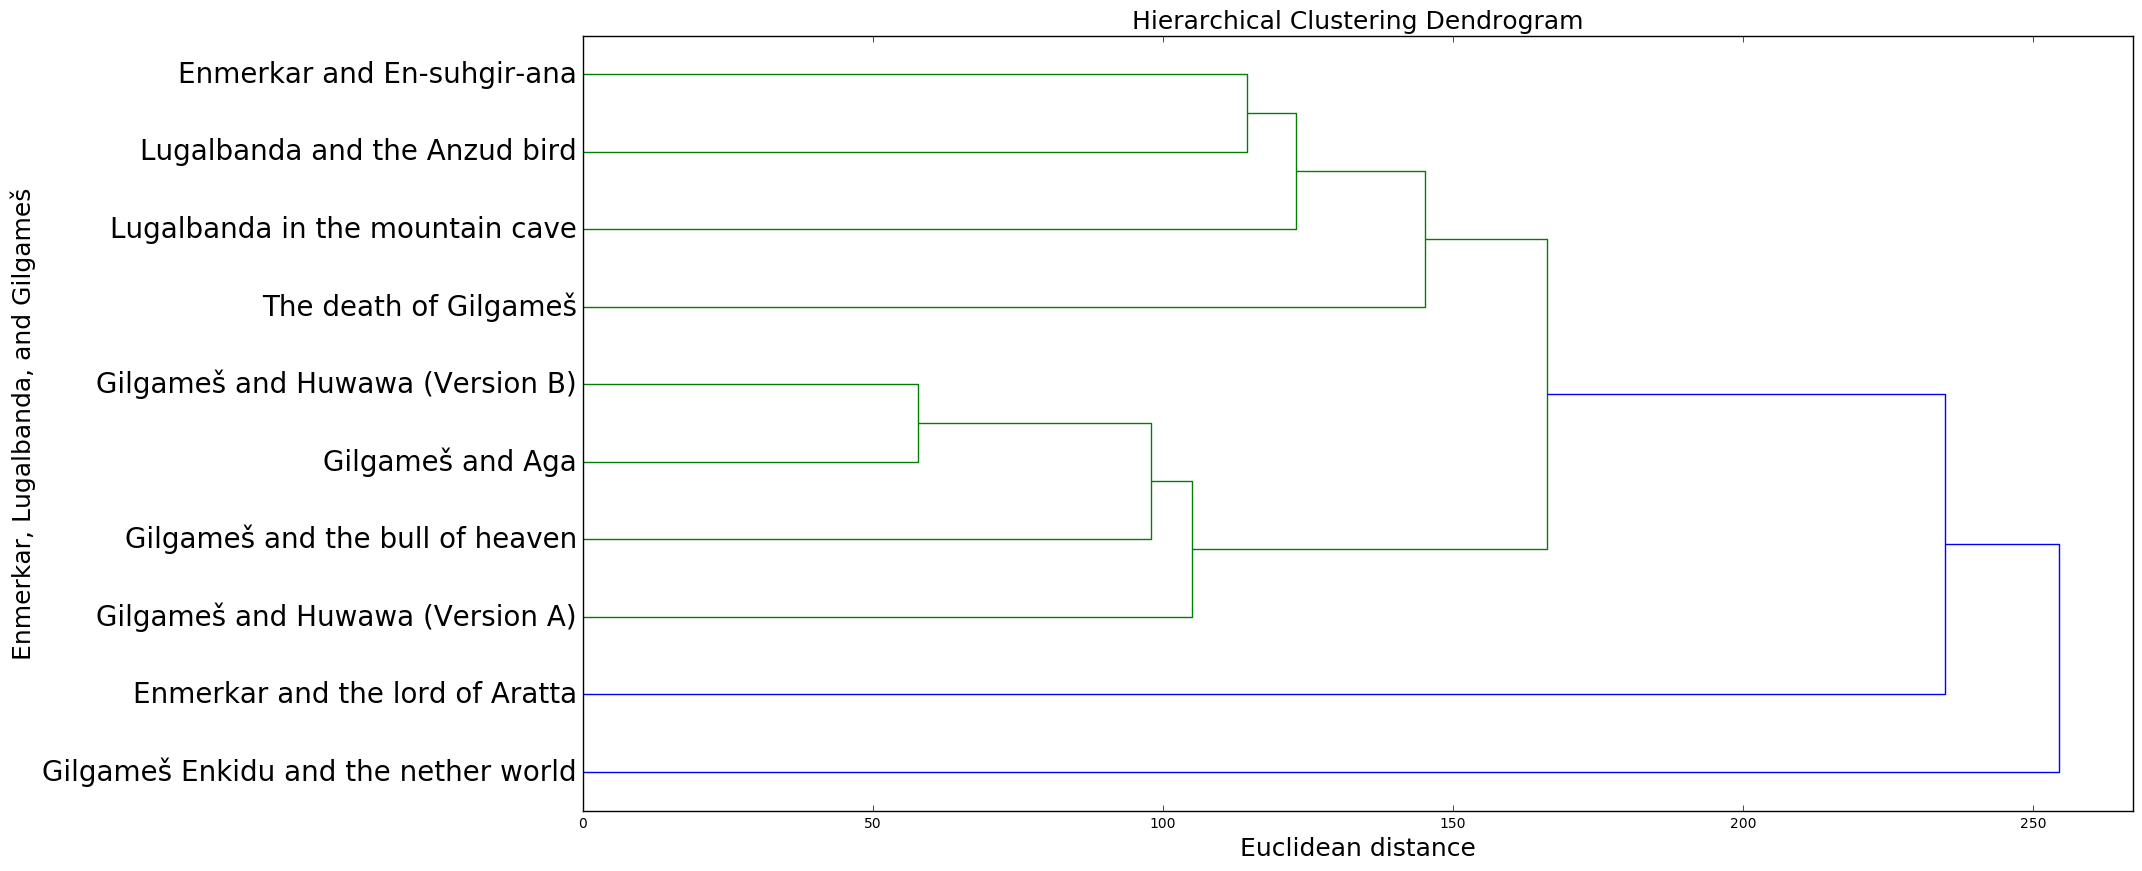

0.93566370958406797

In [8]:
heroic_df = dtm_raw.loc[heroic_names] # select the heroic narratives
labels = heroic_names #create lables for the dendrogram
Z = linkage(heroic_df, 'ward', 'euclidean')
#Z = linkage(heroic_df, 'average', 'cosine')
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize = 18)
plt.xlabel('Euclidean distance', fontsize=18)
plt.ylabel('Enmerkar, Lugalbanda, and Gilgameš', fontsize = 18)
dendrogram(
        Z,
        labels = labels,
        orientation = 'right',
#        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=20.,  # font size for the x axis labels
    )
plt.show()
c, coph_dists = cophenet(Z, pdist(heroic_df, 'euclidean'))
c

# More Sensible: TF-IDF; Cosine Distance; n-grams

Hierarchical clustering is very sensitive to text lenght. *Enmerkar and the Lord of Aratta* and *Gilgameš Enkidu and the netherworld* are by far the longest texts in this group - which makes it likely that they cluster together. Moreover, words are not created equal: some words are more important in our comparison than others. Finally, we may want to look at *word sequences* rather than individual words.

`Tf-idf` (Text Frequency - Inverse Document Frequency) is a vectorizer that **weighs** words and **normalizes** for text length. The weight of a word that appears frequently in a certain document increases (**Text Frequency**). The weight of a word that appears in many (or all) documents decreases (**Inverse Document Frequency**). `Tf-idf` normalizes for text length (the sum of each row is 1); the weights are scaled between 0 and 1.

The `tf-idf` vectorizer can also look at n-grams (sequences of `n` lemmas). In the present analysis we allow unigrams and bigrams. From a sentence like *lugal-e e₂ mu-un-du₃* ('the king built the temple') we get the following variables:
* Unigrams
    * lugal[king]N
    * e[house]N
    * du[build]V/t
* Bigrams:
    * lugal[king]N e[house]N
    * e[house]N du[build]V/t

The bigrams will capture common word combination such as *an ki* (heaven and earth) or so-called compound verbs, such as *ki aŋ₂* (to love).

Among the settings for `tf-idf` are `max_df` and `min_df` or maximum and minimum document frequency. **Document frequency** refers to the percentage of the documents that contain a certain term at least once. Common values are 80% and 20% - that is, terms that appear in more than 80% or less than 20% of the documents in the corpus are excluded from the analysis. This setting excludes far too many words for the present purpose; moreover, rare words and bigrams may be of great interest in comparing Sumerian compositions.

Currently `max_df` and `min_df` are set to 80% and .5%, respectively. This excludes very common words that appear in almost every text, as well as unique words and bigrams that appear only in a single composition.

The table shows the ten words with the heighest weights throughout the corpus in the herioc narratives. 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=.8, max_features=200000,
                                 min_df=0.005,
                                 use_idf=True, token_pattern=r'[^ ]+', ngram_range=(1,2))
tfidf_matrix = tfidf_vectorizer.fit_transform(etcsl_data_df['text'])
dtm = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf_vectorizer.get_feature_names(), 
                              index = etcsl_data_df['text_name'])
fr_words = np.argsort(dtm.sum()) # sort by highest column total
d = dtm[fr_words].iloc[:,-10:] #apply sort to dtm and select last ten columns
d.loc[heroic_names] #select the heroic narratives

sux:kug[pure]v/i  sux:kur[mountain]n  \
text_name                                                                    
Gilgameš and Aga                              0.000000            0.014760   
Gilgameš and the bull of heaven               0.065442            0.010006   
The death of Gilgameš                         0.014354            0.042798   
Gilgameš Enkidu and the nether world          0.028075            0.116257   
Gilgameš and Huwawa (Version A)               0.041655            0.144895   
Gilgameš and Huwawa (Version B)               0.047150            0.124957   
Lugalbanda in the mountain cave               0.091856            0.193990   
Lugalbanda and the Anzud bird                 0.107586            0.099549   
Enmerkar and the lord of Aratta               0.082702            0.132958   
Enmerkar and En-suhgir-ana                    0.078219            0.064018   

                                      sux:ud[sun]n  sux:ŋar[place]v/t  \
text_name                                                               
Gilgameš and Aga                          0.019348           0.064871   
Gilgameš and the bull of heaven           0.004372           0.030784   
The death of Gilgameš                     0.155839           0.065836   
Gilgameš Enkidu and the nether world      0.050798           0.032702   
Gilgameš and Huwawa (Version A)           0.014471           0.050946   
Gilgameš and Huwawa (Version B)           0.013650           0.027460   
Lugalbanda in the mountain cave           0.109695           0.076902   
Lugalbanda and the Anzud bird             0.070885           0.042132   
Enmerkar and the lord of Aratta           0.063378           0.055249   
Enmerkar and En-suhgir-ana                0.067934           0.104508   

                                      sux:e[house]n  sux:šag[heart]n  \
text_name                                                              
Gilgameš and Aga                           0.036673         0.030696   
Gilgameš and the bull of heaven            0.024861         0.016647   
The death of Gilgameš                      0.024812         0.050437   
Gilgameš Enkidu and the nether world       0.020798         0.025145   
Gilgameš and Huwawa (Version A)            0.028801         0.058545   
Gilgameš and Huwawa (Version B)            0.000000         0.071465   
Lugalbanda in the mountain cave            0.037804         0.041135   
Lugalbanda and the Anzud bird              0.007329         0.067476   
Enmerkar and the lord of Aratta            0.012013         0.036198   
Enmerkar and En-suhgir-ana                 0.018179         0.007608   

                                      sux:enlil[1]dn  sux:lugal[king]n  \
text_name                                                                
Gilgameš and Aga                            0.000000          0.078074   
Gilgameš and the bull of heaven             0.000000          0.061749   
The death of Gilgameš                       0.028444          0.025154   
Gilgameš Enkidu and the nether world        0.016226          0.012299   
Gilgameš and Huwawa (Version A)             0.016508          0.014599   
Gilgameš and Huwawa (Version B)             0.000000          0.006885   
Lugalbanda in the mountain cave             0.034128          0.030180   
Lugalbanda and the Anzud bird               0.011027          0.009751   
Enmerkar and the lord of Aratta             0.019280          0.083117   
Enmerkar and En-suhgir-ana                  0.031911          0.032251   

                                      sux:lu[person]n  sux:gal[big]v/i  
text_name                                                               
Gilgameš and Aga                             0.042171         0.031323  
Gilgameš and the bull of heaven              0.028588         0.025481  
The death of Gilgameš                        0.033966         0.027247  
Gilgameš Enkidu and the nether world         0.124006         0.011842  
Gilgameš and Huwawa (Version A) 

# Dendrogram: Second Attempt
The same code as used above, but now using the `tf-idf` normalized Document Term Matrix with cosine distances.

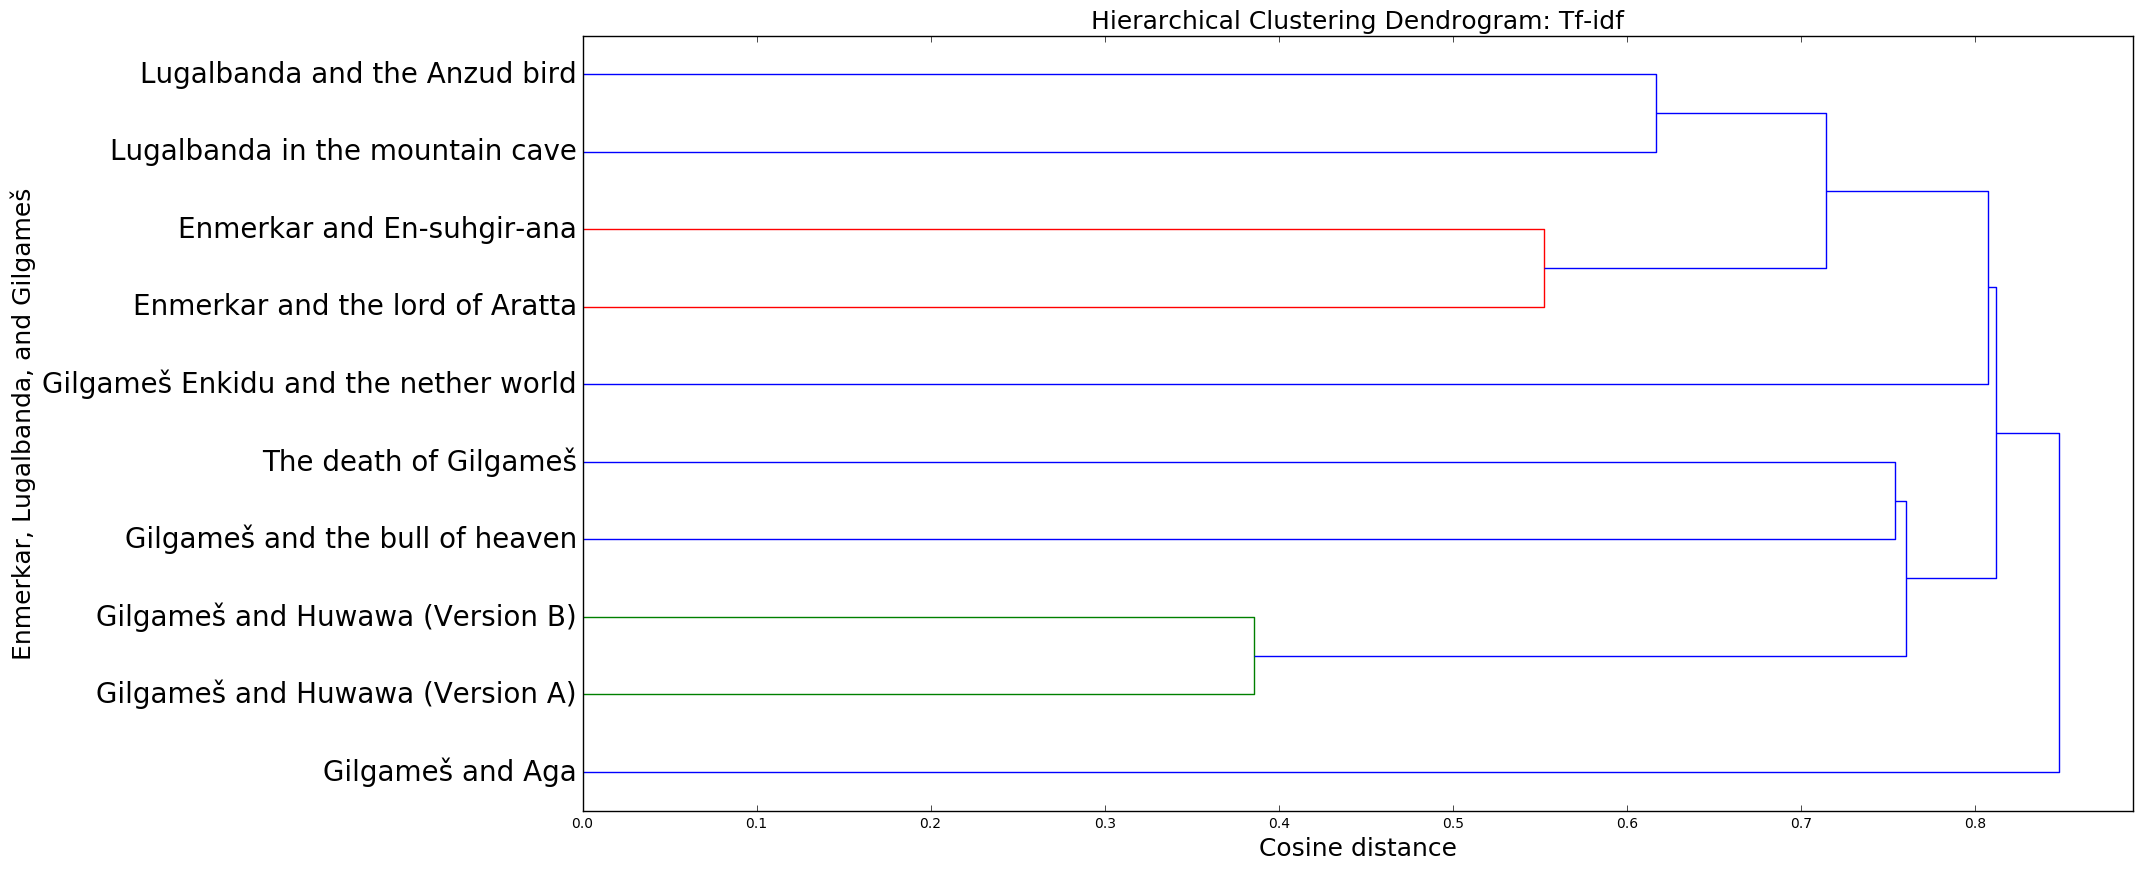

0.9296771832747861

In [10]:
heroic_df = dtm.loc[heroic_names] # select the heroic narratives
labels = heroic_names #create lables for the dendrogram
Z = linkage(heroic_df, 'average', 'cosine')
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram: Tf-idf', fontsize = 18)
plt.xlabel('Cosine distance', fontsize=18)
plt.ylabel('Enmerkar, Lugalbanda, and Gilgameš', fontsize = 18)
dendrogram(
        Z,
        labels = labels,
        orientation = 'right',
        leaf_font_size=20.,  # font size for the x axis labels
    )
plt.show()
c, coph_dists = cophenet(Z, pdist(heroic_df, 'cosine')) # cophenetic correlation indicates
c                                                       # Goodness of Fit of the dendrogram

# Eliminate Proper Nouns
The clustering is based entirely on vocabulary counts. It is possible that proper nouns skew the computation. The Enmerkar stories use the name *Enmerkar* a lot; the Lugalbanda stories will have a high count for *Lugalbanda*. To check for this we may eliminate the proper nouns from the analysis.

The arrangement of the Dendrogram changes slightly, but not dramatically. Based on vocabulary alone, disregarding proper nouns, the Enmerkar and Lugalbanda stories still cluster very closely.

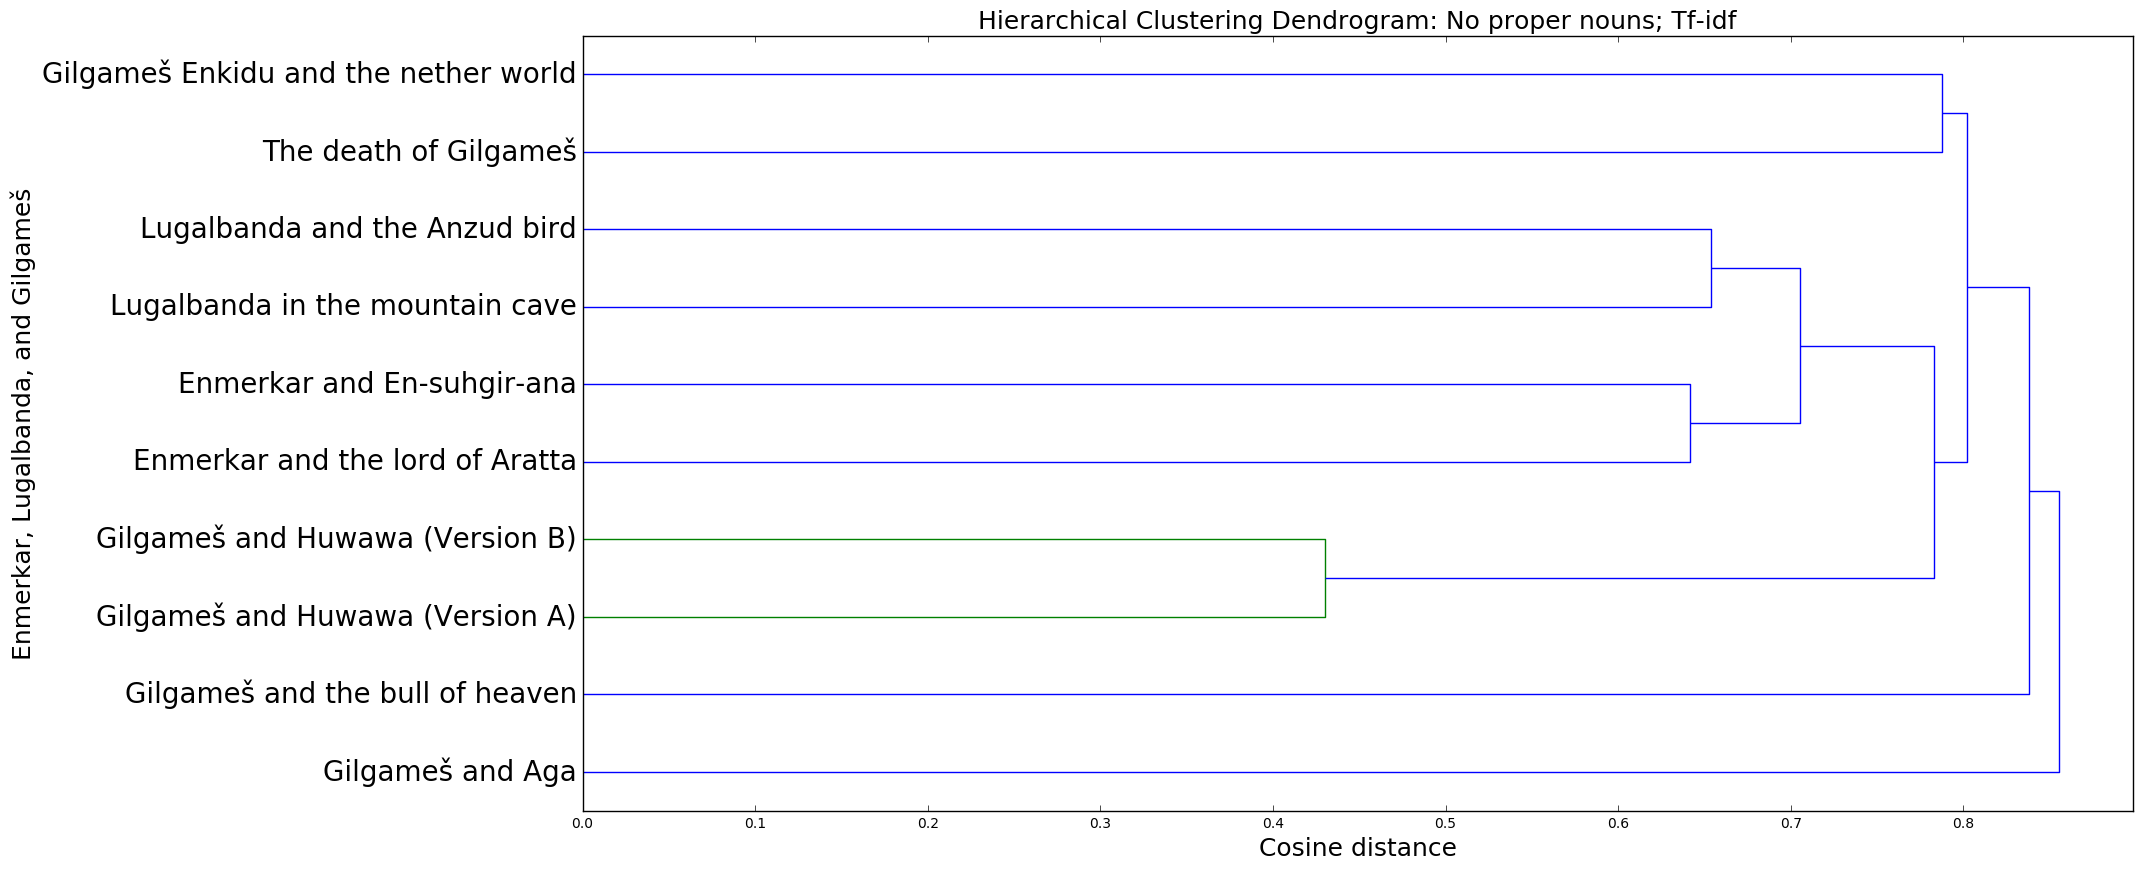

0.92836279298794877

In [11]:
qpn = ['cn', 'dn', 'en', 'fn', 'gn', 'mn', 'on', 'pn', 'rn', 'sn', 'tn', 'wn']
# using the ORACC Part of Speech (POS) abbreviations for pn = 'personal name' etc.
words = heroic_df.columns
words_no_names = [word for word in words if not word[-2:] in qpn]
heroic_no_names_df = heroic_df[words_no_names]
Z = linkage(heroic_no_names_df, 'average', 'cosine')
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram: No proper nouns; Tf-idf', fontsize = 18)
plt.xlabel('Cosine distance', fontsize=18)
plt.ylabel('Enmerkar, Lugalbanda, and Gilgameš', fontsize = 18)
dendrogram(
        Z,
        labels = labels,
        orientation = 'right',
        leaf_font_size=20.,  # font size for the x axis labels
    )
plt.show()
c, coph_dists = cophenet(Z, pdist(heroic_no_names_df, 'cosine'))
c

# Enemerkar and Lugalbanda in Full Corpus

What does the dendrogram look like when we use the full corpus? In the dendrogram below only the heroic tales are labeled, so that the closeness of the Enmerkar stories and the Lugalbanda stories clearly appears.

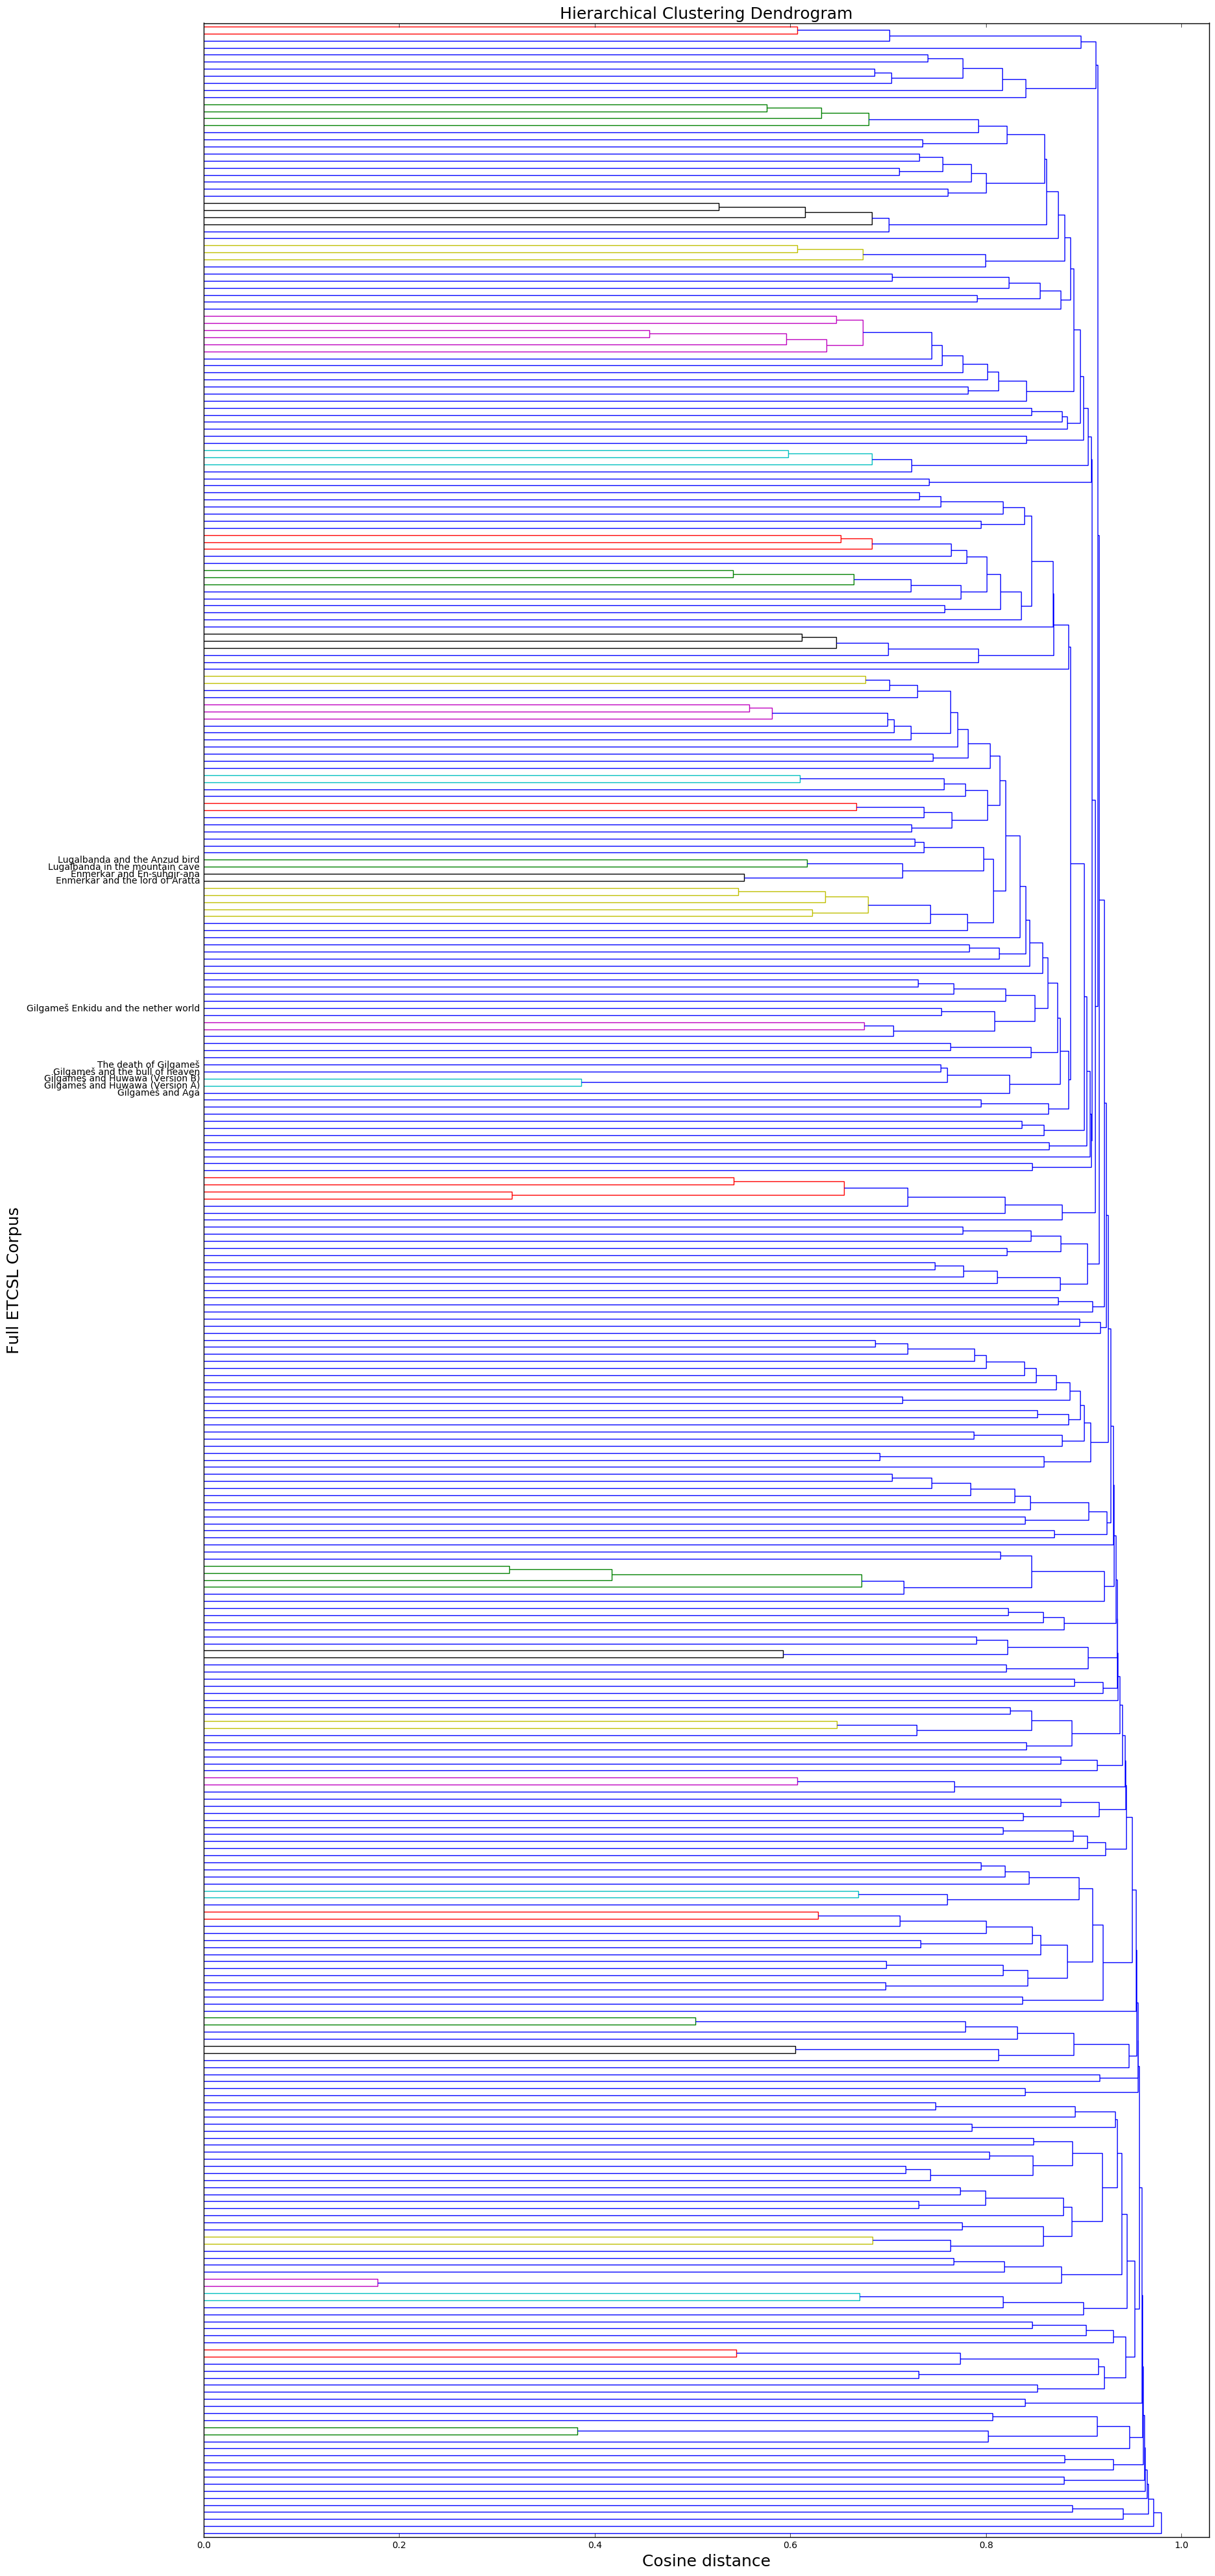

0.67854085445983425

In [12]:
text_names = etcsl_data_df['text_name']
heroic_text_names = [name if name in list(heroic_names) else '' for name in text_names]
Z = linkage(dtm, 'average', 'cosine')
plt.figure(figsize=(20, 50))
plt.title('Hierarchical Clustering Dendrogram', fontsize = 18)
plt.xlabel('Cosine distance', fontsize=18)
plt.ylabel('Full ETCSL Corpus', fontsize = 18)
dendrogram(
        Z,
        labels = heroic_text_names,
        orientation = 'right',
        leaf_font_size=10.,  # font size for the x axis labels
    )
plt.show()
c, coph_dists = cophenet(Z, pdist(dtm, 'cosine'))
c

# Exploring the Full Corpus
Labeling all the compositions makes the dendrogram hard to read, but some patterns clearly emerge. 
* City Laments and Curse of Agade
* Groupings of letters
* Proverbs



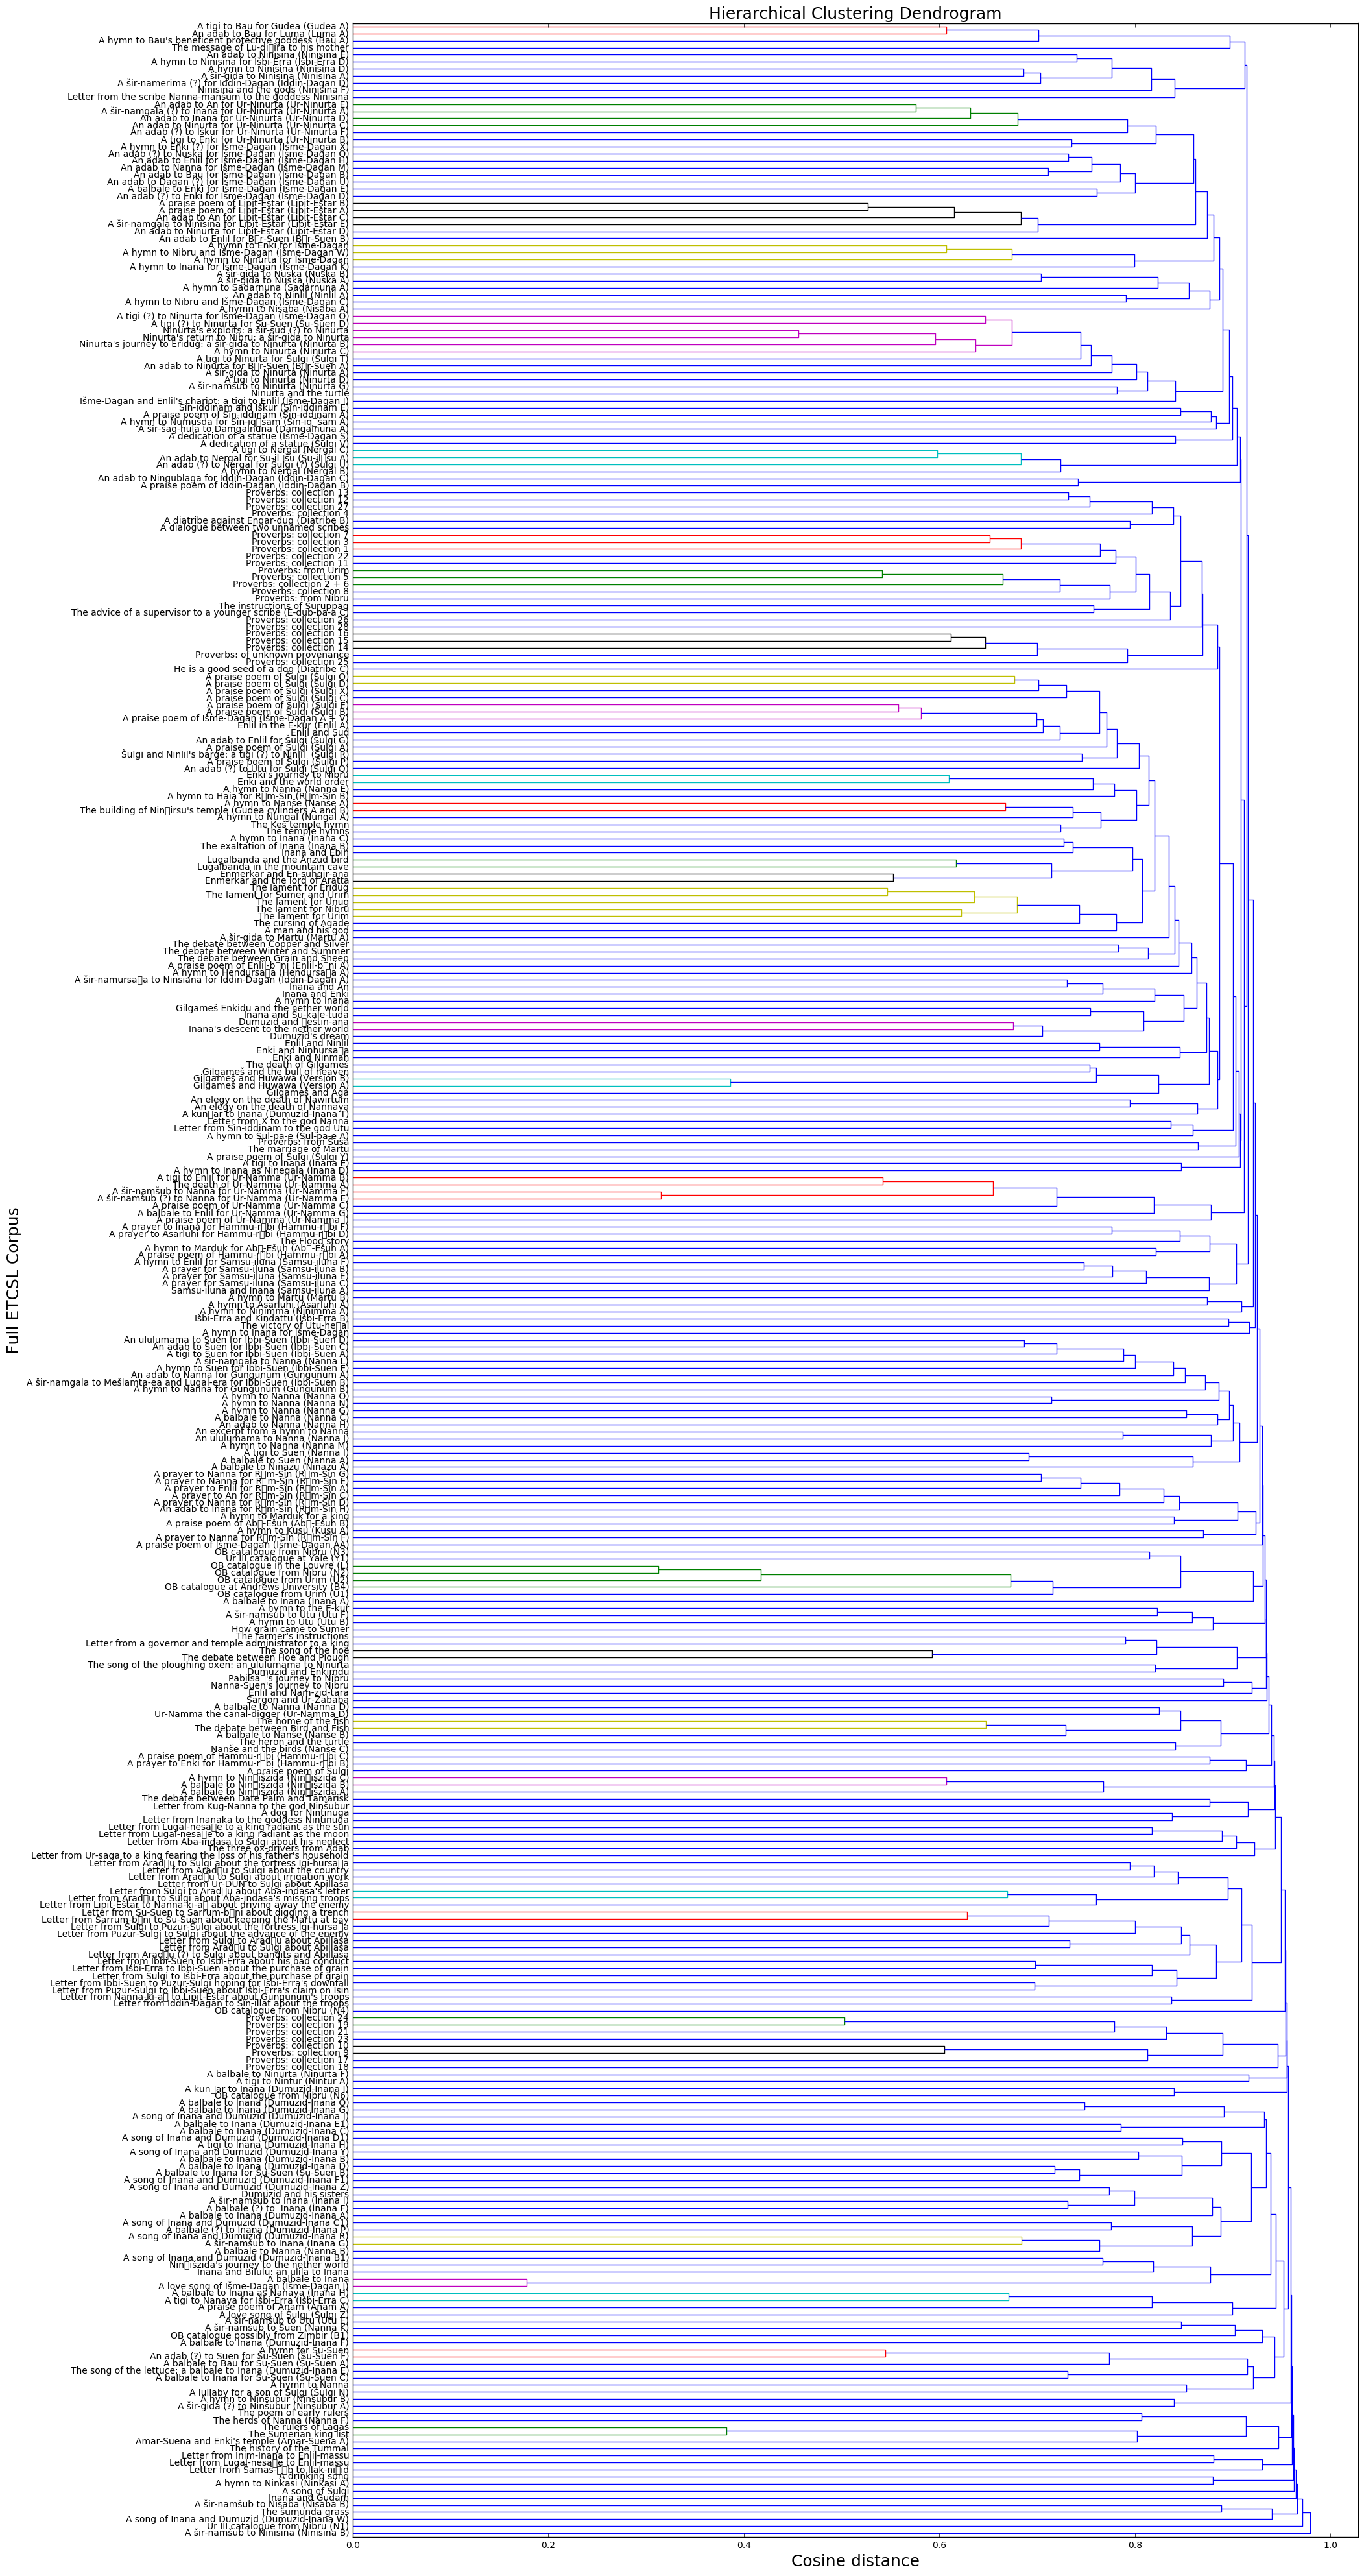

0.67854085445983425

In [13]:
Z = linkage(dtm, 'average', 'cosine')
#Z = linkage(dtm, 'ward')
plt.figure(figsize=(20, 50))
plt.title('Hierarchical Clustering Dendrogram', fontsize = 18)
plt.xlabel('Cosine distance', fontsize=18)
plt.ylabel('Full ETCSL Corpus', fontsize = 18)
dendrogram(
        Z,
        labels = text_names,
        orientation = 'right',
        leaf_font_size=10.,  # font size for the x axis labels
    )
plt.show()
c, coph_dists = cophenet(Z, pdist(dtm, 'cosine'))
c